In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics

In [2]:
# read in tsv data
df = pd.read_table("fruit.tsv")

In [3]:
#display first 5 rows
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# counts of each fruit name
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [5]:
# new dataframe containing limited columns
newdf = df[['fruit_name','mass','width','height','color_score']]

Text(0, 0.5, 'Height (CM)')

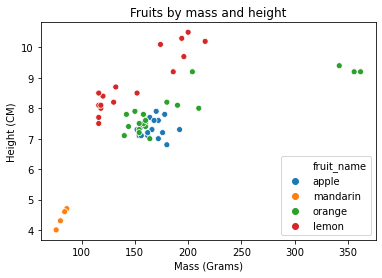

In [6]:
# creates scatterplot for fruits
ax = sns.scatterplot('mass','height','fruit_name', data = newdf)
ax.set_title('Fruits by mass and height')
ax.set_xlabel('Mass (Grams)')
ax.set_ylabel('Height (CM)')


Based on the scatterplot, I think that mass and height could be used as predictor variables. My only concern would be with oranges - I believe that they will be the contributor for almost all errors due to the wide range of mass. 

In [7]:
# segments data for modeling
y = newdf[['fruit_name']]
x = newdf[['mass','width','height','color_score']]

In [8]:
# splits data into testing and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, test_size=0.30, random_state=0)

In [9]:
# prints summary of x variables
print(x.describe())

             mass      width     height  color_score
count   59.000000  59.000000  59.000000    59.000000
mean   163.118644   7.105085   7.693220     0.762881
std     55.018832   0.816938   1.361017     0.076857
min     76.000000   5.800000   4.000000     0.550000
25%    140.000000   6.600000   7.200000     0.720000
50%    158.000000   7.200000   7.600000     0.750000
75%    177.000000   7.500000   8.200000     0.810000
max    362.000000   9.600000  10.500000     0.930000


In [10]:
# prints summary of y variables
print(y.describe())

       fruit_name
count          59
unique          4
top         apple
freq           19


In [11]:
# standardizes data
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  

In [12]:
# initializes and runs the classifier
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train, np.ravel(y_train))
y_pred = classifier.predict(x_test) 


In [13]:
# creates and prints confusion matrix
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)

[[4 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [1 1 0 7]]


In [14]:
# prints accuracy score
print('Accuracy score for model is:', metrics.accuracy_score(y_test, y_pred))

Accuracy score for model is: 0.8888888888888888
